## Initialization 

#### Load the CSV into a Pandas DataFrame.

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns 

### Data Loading and Preprocessing

In this section, we will load the dataset and perform some basic preprocessing steps. Such as data info, data types, and missing values.


In [2]:
def load_and_describe(file_name):
    data = pd.read_csv(file_name)
    print(f"Loaded the data {file_name} successfully")

    # data description 
    print(f"\n {'=='*10}  Data description {'=='*10}\n")
    print(data.info())
    print(f"\n {'=='*10} Data head {'=='*10}\n")
    print(data.head(3),'\n')
    print(f"{'=='*10} Data Describe {'=='*10}\n")
    display(data.describe())
    print(f"\n {'=='*10} Data shape {'=='*10}\n")
    print(data.shape,'\n')
    print(f"\n {'=='*10} Data columns {'=='*10}\n")
    print(data.columns,'\n')
    print(f"\n {'=='*10} Data dtypes {'=='*10}\n")
    print(data.dtypes)

    
    return data 

### Data cleaning 
- In this section, we will clean the dataset by removing any unnecessary columns and handling missing values.
- And we will also check for duplicates and remove them if necessary.




In [3]:
def data_cleaning(data): 
    print(f"\n {'=='*10} Data cleaning {'=='*10} \n")
    # remove duplicate rows
    print(f" {'=='*10} Removing duplicate rows {'=='*10} \n")
    
    data = data.drop_duplicates()
    
    print(f"\n Number of rows after removing duplicates: {data.shape[0]} \n")

    # remove rows with missing values
    print(f'\n {'=='*10} Checking for missing values {'=='*10} \n')
    print(data.isnull().sum())
    print(f"\n {'=='*10} Removing rows with missing values {'=='*10} \n")
    # remove rows with missing values
    data = data.dropna(subset=['quote', 'author', 'tags'])
    print(f" Number of rows after removing missing values: {data.shape[0]}\n")
    
    print(f'is null:{data.isnull().sum()}')
    # remove rows with empty strings
    condition = (data['quote'] != '') & (data['author'] != '') & (data['tags'] != '')
    data = data[condition]
    print(f" Number of rows after removing invalid values: {data.shape[0]}\n")
    # remove rows with invalid values
    
    print(f" \n {'=='*10} Number of Authors {'=='*10} \n")
    print(f'The number of authors are : {len(np.unique(data['author']))}')

    # Number of Tags 
    print(f"\n {'=='*10} Number of Tags {'=='*10}\n")
    print(f'\n Total number of tags are :\n {len(np.unique(data['tags']))}\n')
    
    # Number of Quotes
    print(f"\n {'=='*10} Number of Quotes {'=='*10}\n")
    print(f"Number of Quotes are : {len(np.unique(data['quote']))}")
    # Number of Quotes by Author
    print(f"\n {'=='*10} Number of Quotes by Author {'=='*10}\n")
    print(f"Top 3 authors with most number of quotes : {data['author'].value_counts().head(3)}")
    # Number of Quotes by Tags
    print(f"\n {'=='*10} Number of Quotes by Tags {'=='*10}\n")
    print(f"Top 3 quotes by Tags : \n {data['tags'].value_counts().head(3)} \n")
    
    return data

### 2. **Data Visualization**
- In this section, we will create various visualizations to better understand the dataset. 
- We will use libraries like Matplotlib and Seaborn for this purpose. We will create:


- **Bar chart** of the top 10 most quoted authors.
- **Word cloud** of the most common words in the quotes.
- **Pie chart** showing the proportion of top 5 tags.
- Any other creative visualization that helps understand the dataset.

In [4]:


def visualize_data(data):
    print(f"\n {'=='*10} Visualizing data {'=='*10}\n")
    # plot the number of quotes by author
    plt.figure(figsize=(15, 6))
    # Get the top 10 authors
    top_authors = data['author'].value_counts().head(10).reset_index()
    top_authors.columns = ['author', 'quote_count']
    sns.barplot(x='author', y='quote_count', data=top_authors)
    plt.title('Top 10 most quoted authors')
    plt.xlabel('Author')
    plt.ylabel('Number of Quotes')
    plt.show()

    # plotting the worl cloud for the most common words in quotes
    plt.figure(figsize=(15, 8))
    all_quotes = ' '.join(data['quote'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_quotes)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Most Common Words in Quotes')
    plt.show()

    # plotting the pie chart for  proportion of top 5 tags
    plt.figure(figsize=(10, 8))
    top_tags = data['tags'].value_counts().head(5)
    plt.pie(top_tags, labels=top_tags.index, autopct='%1.1f%%')
    plt.title('Proportion of Top 5 Tags')
    # plt.axis('equal')
    plt.show()

    # other creative visualizations can be added here
    # Plotting the bar chart for the most common tags
    plt.figure(figsize=(15, 6))
    top_tags = data['tags'].value_counts().head(10).reset_index()
    top_tags.columns = ['tags', 'quote_count']
    sns.barplot(x='tags', y='quote_count', data=top_tags)
    plt.title('Top 10 most common tags')
    plt.xlabel('Tags')
    plt.ylabel('Number of Quotes')
    plt.xticks(rotation=90)
    plt.show()



    ## Plotting quotes length distribution

    plt.figure(figsize=(15, 6))
    # Calculate the length of each quote
    data['quote_length'] = data['quote'].apply(lambda x: len(x.split()))
    # Plot the distribution of quote lengths
    sns.histplot(data['quote_length'], bins=20, kde=False)
    plt.title('Distribution of Quote Lengths')
    plt.xlabel('Length of Quote (in words)')
    plt.ylabel('Frequency')
    plt.show()


    # Plotting Sentiment Analysis Plot
    from textblob import TextBlob

    # Calculate the sentiment polarity : 
    data['sentiment'] = data['quote'].apply(lambda x: TextBlob(x).sentiment.polarity)
    data['sentiment'].plot(kind='hist', bins=20)
    plt.title('Sentiment Analysis of Quotes')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()



### Calling the Load and Describe function


In [5]:
file_name = 'scraped_data.csv'
# load and describe the data
data = load_and_describe(file_name)

Loaded the data scraped_data.csv successfully

 ====================  Data description ====================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quote   100 non-null    object
 1   author  100 non-null    object
 2   tags    97 non-null     object
dtypes: object(3)
memory usage: 2.5+ KB
None

 ==================== Data head ====================

                                               quote           author  \
0  “The world as we have created it is a process ...  Albert Einstein   
1  “It is our choices, Harry, that show what we t...     J.K. Rowling   
2  “There are only two ways to live your life. On...  Albert Einstein   

                                           tags  
0        change, deep-thoughts, thinking, world  
1                            abilities, choices  
2  inspirational, life, live, miracle, miracles   

=============

,quote,author,tags
count,100,100,97
unique,100,50,83
top,“The world as we have created it is a process ...,Albert Einstein,love
freq,1,10,4



 ==================== Data shape ====================

(100, 3) 


 ==================== Data columns ====================

Index(['quote', 'author', 'tags'], dtype='object') 


 ==================== Data dtypes ====================

quote     object
author    object
tags      object
dtype: object


### Calling the data cleanup function

In [6]:
cleaned_df = data_cleaning(data)


 ==================== Data cleaning ==================== 

 ==================== Removing duplicate rows ==================== 


 Number of rows after removing duplicates: 100 


 ==================== Checking for missing values ==================== 

quote     0
author    0
tags      3
dtype: int64

 ==================== Removing rows with missing values ==================== 

 Number of rows after removing missing values: 97

is null:quote     0
author    0
tags      0
dtype: int64
 Number of rows after removing invalid values: 97

 
 ==================== Number of Authors ==================== 

The number of authors are : 49

 ==================== Number of Tags ====================


 Total number of tags are :
 83


 ==================== Number of Quotes ====================

Number of Quotes are : 97

 ==================== Number of Quotes by Author ====================

Top 3 authors with most number of quotes : author
Albert Einstein    10
J.K. Rowling        8
Mark Twain     

### Calling the Data Visualization function



 ==================== Visualizing data ====================



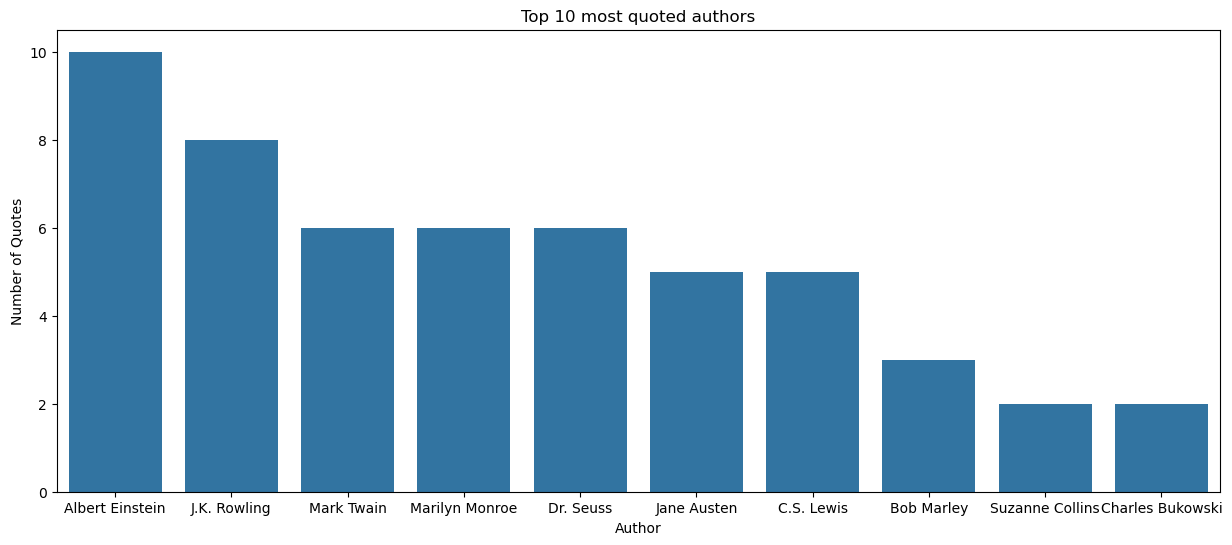

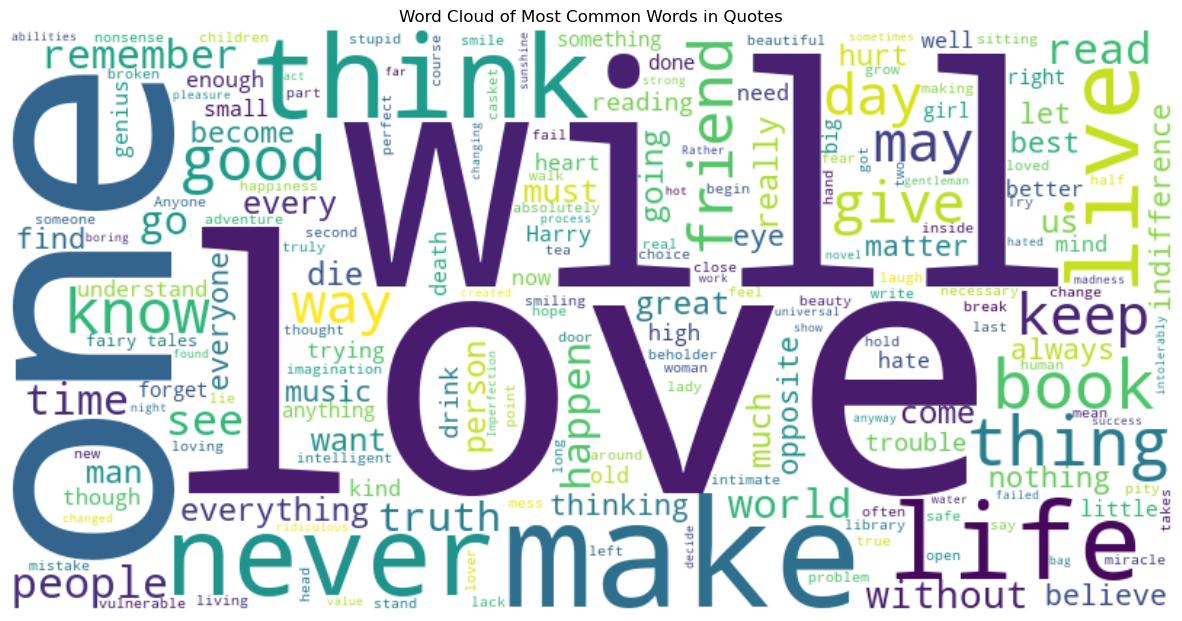

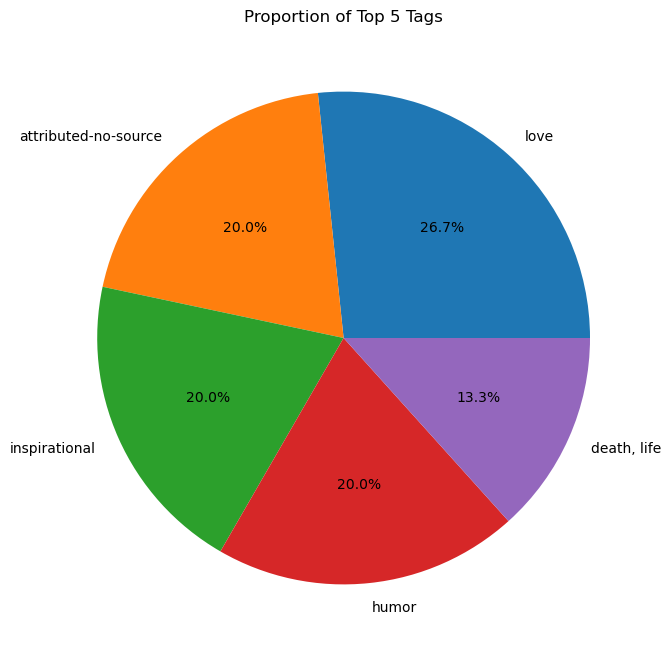

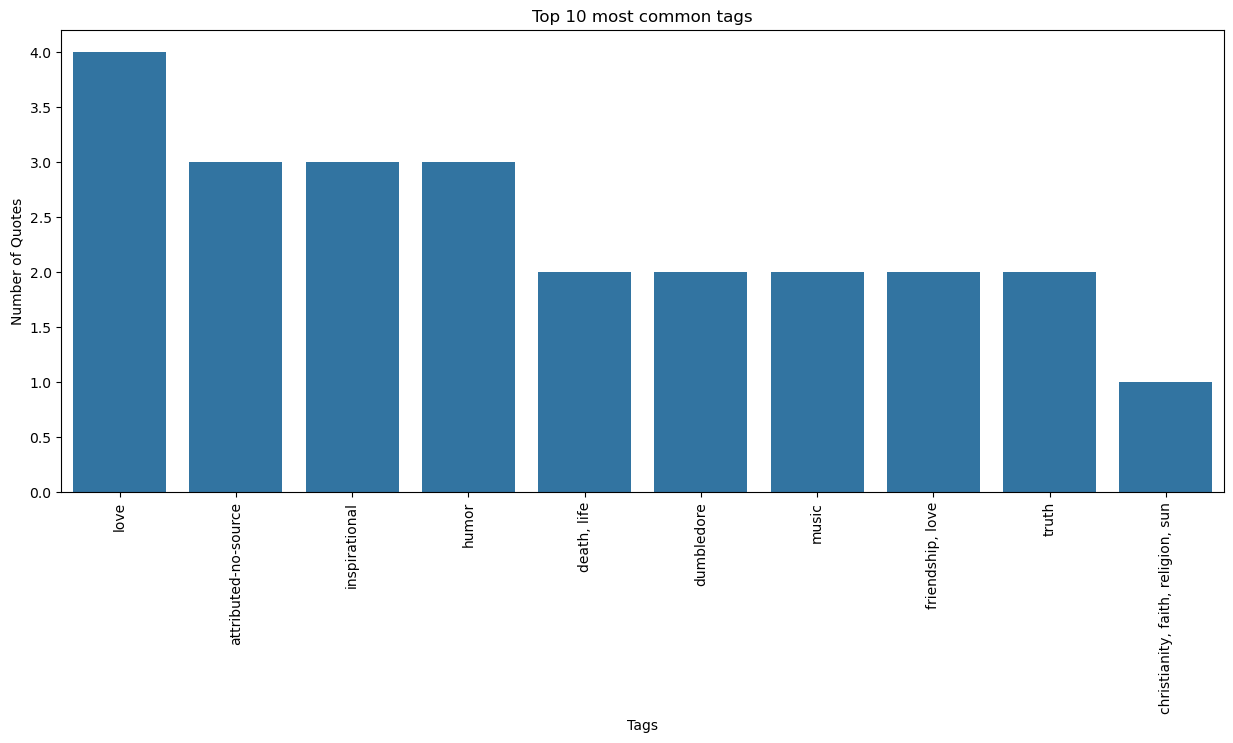

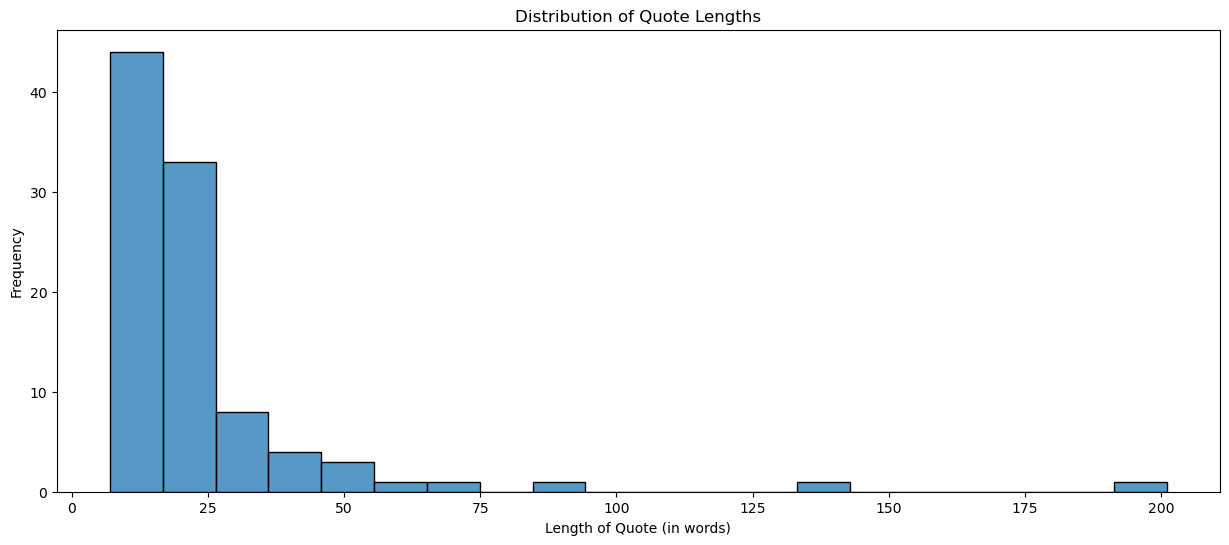

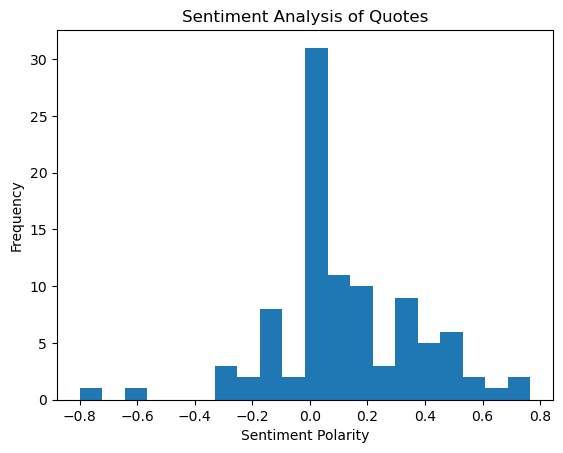

In [7]:
visualize_data(cleaned_df)

## Summary : 
### Dataset Overview
- The dataset contains a collection of quotes from various authors, each associated with one or more tags. 
- The dataset is structured with the following columns:
  - **Quote**: The text of the quote.
  - **Author**: The name of the author of the quote.
  - **Tags**: A list of tags associated with the quote.

  ## Key statistics: 
  - Total number of quotes: 100
  - Total number of unique authors: 50
  - Total number of unique tags: 83
    - **Most quoted author**: Albert Einstein
    - **Most common tags**: love and Inspirational 


**Insights:** 
- 
- The dataset contains a diverse range of quotes from various authors, with a significant number of unique tags.
- The most quoted author is Albert Einstein, indicating their prominence in the dataset. 
- The analysis of tags reveals that certain themes are more prevalent, providing insights into the topics that resonate with the audience.

- The tags are diverse, covering a wide range of topics, including love, life, and motivation. 
- This indicates that the dataset is rich in content and can cater to various interests.


####  **Sentiment Analysis**

- Sentiment analysis of the quotes reveals a mix of positive, negative, and neutral sentiments with a predominance of positive sentiments. 
- This indicates that the quotes in the dataset are generally uplifting and motivational.

